# D1AED – Anâlise Estâtísticâ pârâ Ciência de Dados

## Atividâde em Dupla 1

### Alunos
Evandro Henrique Couto de Paula. Prontuário: CP301358-8<br>
Jessé de Freitas. Prontuário:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando datasets
movies = pd.read_csv('ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/links.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

#### Análise movies

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.shape

(9742, 3)

In [6]:
#Generos Disponíveis
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [7]:
genre_labels

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [8]:
#Separendo a coluna de generos e expandindo o resultado para um dataframe
genres_series = movies['genres'].str.split('|', expand=True)

#Agrupando o dataframe em uma serie
genres_series_to_count = genres_series.stack()

In [9]:
#Realizando a contragem de aparição de generos
genres_series_to_count.value_counts()

#Apresentando a contagem de categorias
genres_count = pd.DataFrame(genres_series_to_count.value_counts(), columns=['Count'])
genres_count.index.name = 'Genre'
genres_count

,Count
Genre,
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978


In [10]:
pd.options.display.max_rows = 10
movies['title'] = movies['title'].str.strip()
movies['title'].str.slice(start=-5, stop=-1)
movies['release_year'] = movies['title'].str.slice(start=-5, stop=-1)
movies['release_year'] = movies.release_year.str.replace('\)','', regex=True)
movies['release_year'] = movies.release_year.str.replace('\(','', regex=True)
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='signed').astype(pd.Int64Dtype())
movies['release_year'].drop_duplicates()


0       1995
48      1994
54      1996
98      1976
105     1992
        ... 
8439    2015
8684    2016
8687    2017
8693    2018
9020    1908
Name: release_year, Length: 107, dtype: Int64

#### Análise links

In [11]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
links.shape

(9742, 3)

In [13]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


## Análise ratings

In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
ratings.shape

(100836, 4)

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<AxesSubplot:xlabel='rating', ylabel='Count'>

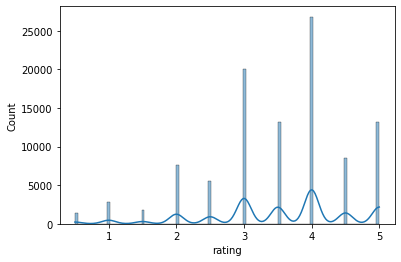

In [17]:
sns.histplot(ratings, x=ratings['rating'], kde=True)

<AxesSubplot:>

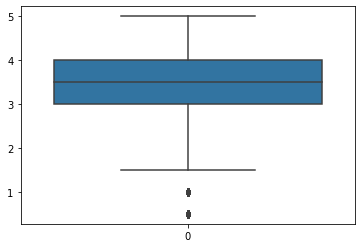

In [18]:
ratings_data  = ratings['rating'] 
sns.boxplot(data=ratings_data)

## Análise tags

In [19]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [20]:
tags.shape

(3683, 4)

In [21]:
tags['tag'].str.lower().drop_duplicates()

0                  funny
1        highly quotable
2           will ferrell
3           boxing story
4                    mma
              ...       
3676                70mm
3678           for katie
3679             austere
3680              gun fu
3681    heroic bloodshed
Name: tag, Length: 1475, dtype: object

In [22]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [23]:
# tags['userId'].drop_duplicates()
# plt.figure(figsize=(15, 10))
# sns.histplot(tags, x=tags['movieId'])

# Fundindo datasets

In [24]:
movies_ratings = movies.merge(ratings,on='movieId')

In [25]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movieId       100836 non-null  int64  
 1   title         100836 non-null  object 
 2   genres        100836 non-null  object 
 3   release_year  100819 non-null  Int64  
 4   userId        100836 non-null  int64  
 5   rating        100836 non-null  float64
 6   timestamp     100836 non-null  int64  
dtypes: Int64(1), float64(1), int64(3), object(2)
memory usage: 6.3+ MB


In [26]:
movies_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [27]:
movies_rating_clear = movies_ratings[movies_ratings['release_year'].notna()]
medias_por_ano = movies_rating_clear.groupby('release_year').mean().rating

## Analisando correlação
Analisando relação entre média e ano

In [28]:
correlacao_media_ano = movies_rating_clear[['release_year', 'rating']].corr()
correlacao_media_ano

,release_year,rating
release_year,1.000000,-0.084033
rating,-0.084033,1.000000


In [29]:
print(f"O coeficiente de correlação entre o ano de lançamento dos filmes e suas avaliações é de {correlacao_media_ano.loc['release_year', 'rating']}")

O coeficiente de correlação entre o ano de lançamento dos filmes e suas avaliações é de -0.08403310469227955


<AxesSubplot:xlabel='release_year', ylabel='rating'>

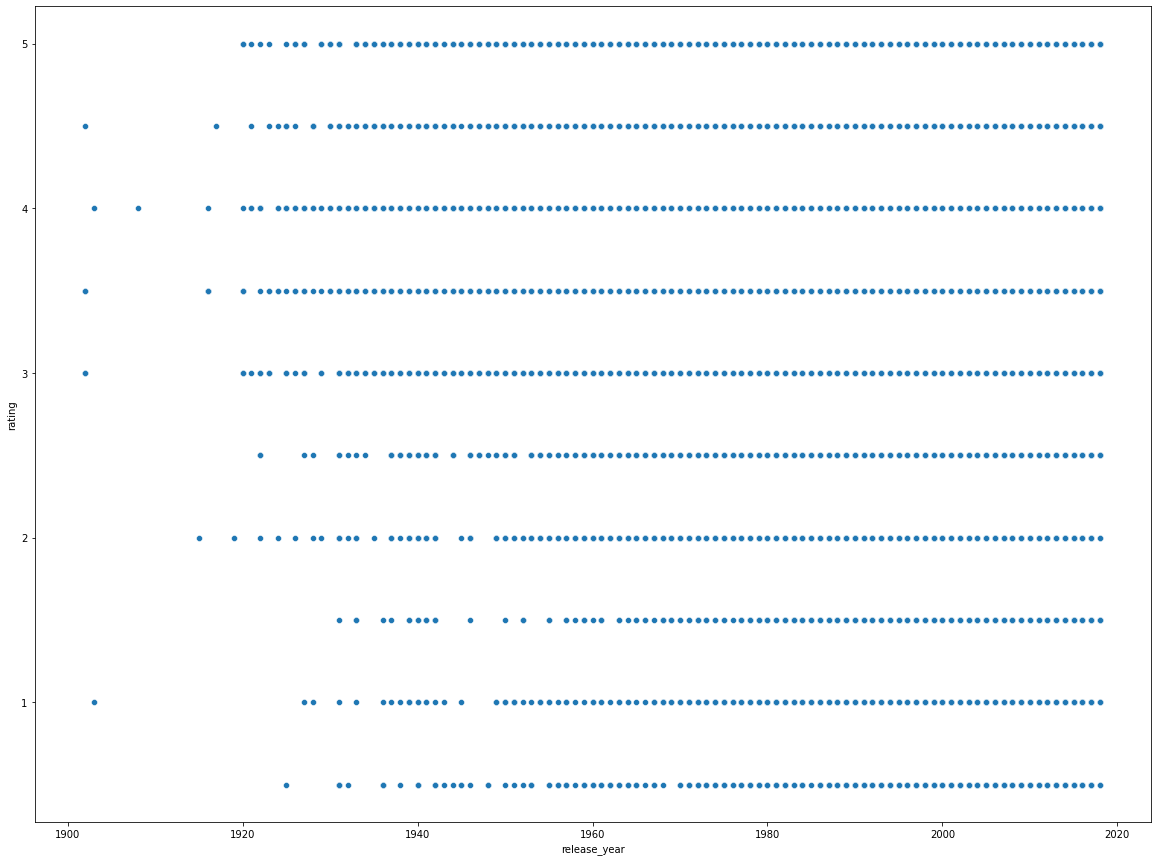

In [30]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=movies_rating_clear, y='rating', x='release_year')

<AxesSubplot:title={'center':'Evolução das média de acordo com o ano de lançamento'}, xlabel='Ano de lançamento', ylabel='Média'>

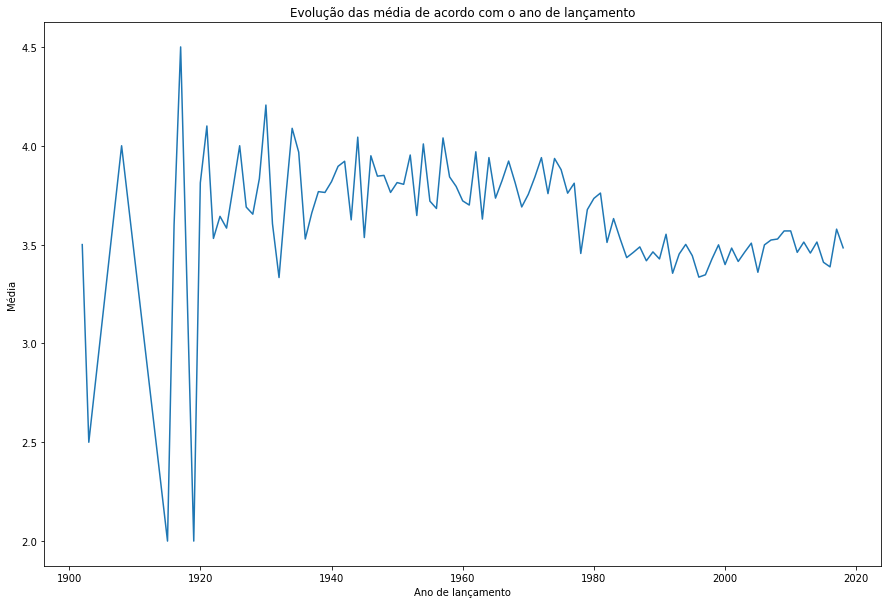

In [31]:
plt.figure(figsize=(15, 10))
grafico_evolucao_media = sns.lineplot(x=medias_por_ano.index, y=medias_por_ano.values, data=medias_por_ano)
grafico_evolucao_media.set(ylabel="Média", xlabel="Ano de lançamento", title="Evolução das média de acordo com o ano de lançamento")
grafico_evolucao_media

## Categorias mais rotuladas

In [32]:
#Realizando a contragem de aparição de generos
genres_series_to_count.value_counts()

#Apresentando a contagem de categorias
pd.options.display.max_rows = 20
genres_count = pd.DataFrame(genres_series_to_count.value_counts(), columns=['Count'])
genres_count.reset_index(level=0, inplace=True)
genres_count.columns= ['genre', 'count']

[Text(0.5, 0, 'Contagem'),
 Text(0, 0.5, 'Genero'),
 Text(0.5, 1.0, 'Frequencia de rotulação')]

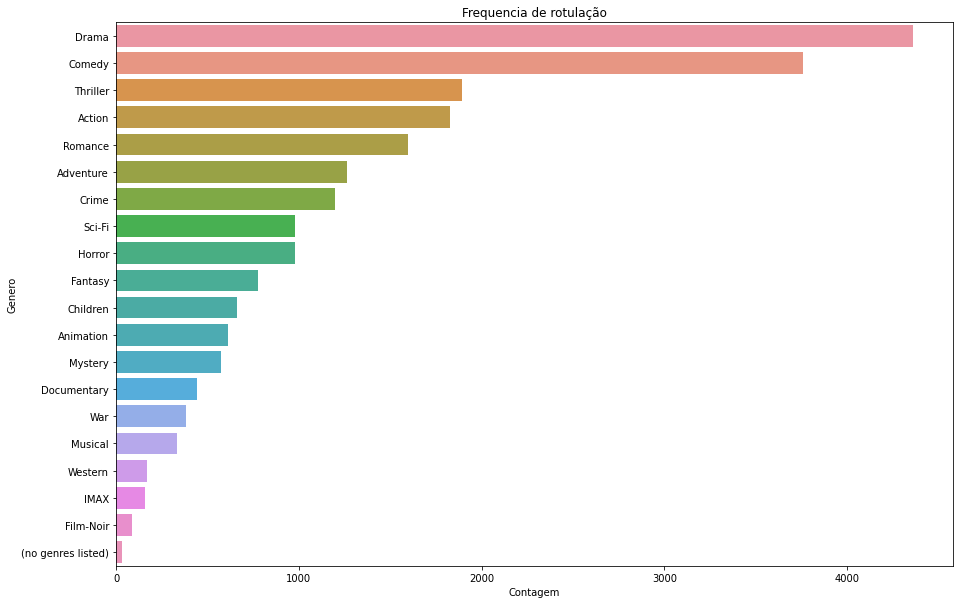

In [33]:
plt.figure(figsize=(15, 10))
freqence_genre = sns.barplot(data=genres_count, y=genres_count['genre'], x=genres_count['count'])
freqence_genre.set(xlabel="Contagem", ylabel="Genero", title="Frequencia de rotulação")



## Media de avaliação das categorias

Qual a média das avaliações das categorias

In [34]:
movies_rating_clear.groupby('title').mean()

,movieId,release_year,userId,rating,timestamp
title,,,,,
'71 (2014),117867.0,2014.0,610.000000,4.000000,1.493850e+09
'Hellboy': The Seeds of Creation (2004),97757.0,2004.0,332.000000,4.000000,1.352671e+09
'Round Midnight (1986),26564.0,1986.0,354.500000,3.500000,1.346507e+09
'Salem's Lot (2004),27751.0,2004.0,345.000000,5.000000,1.342827e+09
'Til There Was You (1997),779.0,1997.0,229.000000,4.000000,1.161440e+09
...,...,...,...,...,...
eXistenZ (1999),2600.0,1999.0,389.954545,3.863636,1.142416e+09
xXx (2002),5507.0,2002.0,272.916667,2.770833,1.211263e+09
xXx: State of the Union (2005),33158.0,2005.0,386.000000,2.000000,1.342892e+09


## A média de notas significa grande número de avaliações?

As médias siginificam que os filmes foram assistidos e avaliados?

In [35]:
movie_mean = movies_rating_clear.groupby('movieId')['rating'].mean()

In [36]:
movie_evaluation = movies_rating_clear.groupby('movieId')['rating'].count()

In [37]:
movie_mean_evaluation = pd.DataFrame({"Média de Notas": movie_mean, "Número de Avaliações": movie_evaluation})

In [38]:
movie_mean_evaluation.sort_values(by='Número de Avaliações', ascending=False)

,Média de Notas,Número de Avaliações
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
...,...,...
71268,5.000000,1
6329,3.000000,1
71302,4.500000,1


## As piores notas são de filmes muito avaliados?

In [39]:
movie_mean_evaluation.sort_values(by='Média de Notas', ascending=True)

,Média de Notas,Número de Avaliações
movieId,,
5356,0.5,1
8494,0.5,1
5105,0.5,1
8632,0.5,1
144352,0.5,1
...,...,...
170777,5.0,1
4402,5.0,1
96430,5.0,1


## As melhores/piores Avaliações são outliers?

<AxesSubplot:ylabel='Média de Notas'>

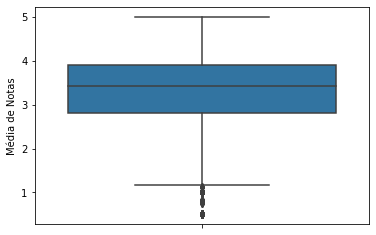

In [40]:
sns.boxplot(data=movie_mean_evaluation['Média de Notas'], y=movie_mean_evaluation['Média de Notas'])

## Quais as cetegorias com a melhores médias

In [126]:
genre_rating = movies_rating_clear[['genres','rating']].reset_index()

In [189]:
ratings_genre = {}
for i in range(len(genres_count['genre'])):
    genre = genres_count['genre'][i]
    ratings_genre[genre] = genre_rating[genre_rating['genres'].str.contains(genres_count['genre'][i])]['rating']

mean_for_genre = {}
for key in ratings_genre:
    mean_for_genre[key] = ratings_genre[key].mean()

movies_genre_mean_df = pd.DataFrame(mean_for_genre, index=[0]).T.reset_index()
movies_genre_mean_df.columns = ['genero', 'media']
movies_genre_mean_df.sort_values(by='media', ascending=False, inplace=True)
movies_genre_mean_df.reset_index(drop=True)

/Users/evandrodepaula/Documents/pos/ds/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,genero,media
0,Film-Noir,3.920115
1,War,3.808294
2,Documentary,3.797785
3,Crime,3.658294
4,Drama,3.656168
5,Mystery,3.632460
6,Animation,3.629937
7,IMAX,3.618335
8,Western,3.583938
9,Musical,3.563678


[Text(0.5, 0, 'Média dos generos'),
 Text(0.5, 1.0, 'Distribuição das médias dos generos')]

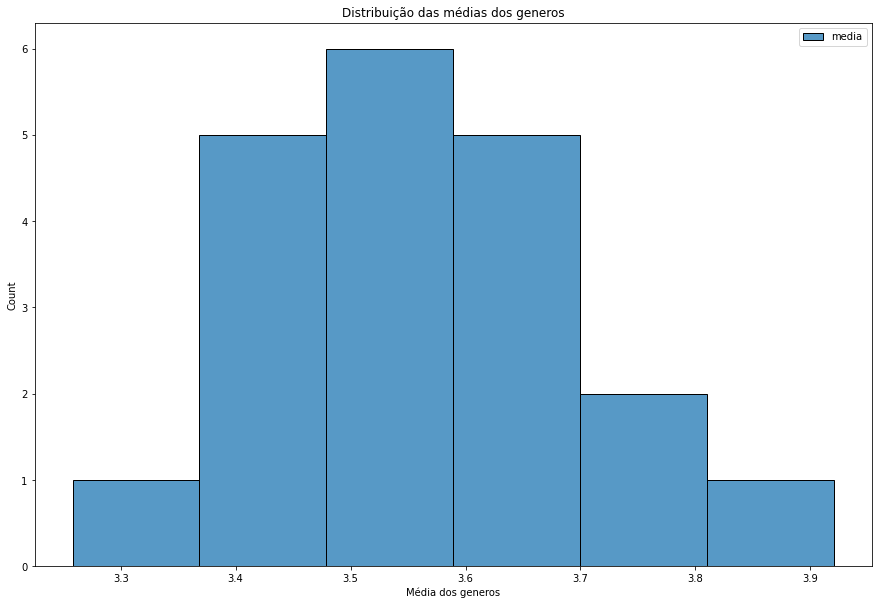

In [190]:
plt.figure(figsize=(15, 10))
hist_genre_mean = sns.histplot(data=movies_genre_mean_df)
hist_genre_mean.set(xlabel='Média dos generos', title= "Distribuição das médias dos generos", )